# Trabajo de título
## Estudio de la complementariedad actual en centrales solar fotovoltaica y eólica en Chile

#### Estudiante: Matías Osses
#### Profesor guía: Rodrigo Palma

## Importando librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import glob

## Data 

Los datos extraídos de la página del Coordinador Eléctrico corresponden a la generación real durante el periodo comprendido entre enero y diciembre de 2020 

In [49]:
files = glob.glob('*.tsv')

df = pd.DataFrame()
for file in files:
    aux = pd.read_csv(file, sep='\t')
    df = pd.concat([df,aux])
df =df.reset_index()
df.tail()

,index,fecha_opreal,hora_opreal,central_infotecnica_id,central_nombre,central_tipo,central_tipo_nemotecnico,generacion_real_mwh,generacion_real_ernc_mwh,fecha,hora,demanda
5121542,8779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-25,11.0,"9509,9559619211"
5121543,8780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-25,24.0,"9238,741613972501"
5121544,8781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-26,13.0,"10015,230259454"
5121545,8782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-26,15.0,"10228,5806398142"
5121546,8783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-26,16.0,"10277,260933795902"


## Manejo y limpieza de datos

In [50]:
# Definiendo una columna que represente la hora y fecha del año 2020.
df = df.drop(df[df.fecha_opreal == "2020-02-29"].index) # eliminamos día bisiesto
df = df.drop(df[df['hora_opreal'] > 24].index) # borrando datos mal inyectados operando en horas imposibles
df['hora_opreal'] = df['hora_opreal'].replace(24,0)

df['time'] = df['fecha_opreal'] + ' ' + df['hora_opreal'].astype('str')+':00:00'
df['time'] = df['time'].str.replace('-','/')
df['time'] = pd.to_datetime(df['time'])

In [51]:
# El dataset extraído corresponde a todas las centrales del país, por lo que extraemos sólo las de interés.

solar = df[df['central_tipo']=='Solar'] #Datos de las centrales solares.
eolica = df[df['central_tipo']=='Eólica'] # Datos de las centrales eólicas.

df = pd.concat([solar,eolica])
df = df.sort_values(['time'], ascending=True)
df = df.reset_index()

eolica = eolica.pivot_table(values='generacion_real_mwh',
                            columns='fecha_opreal', index='hora_opreal', aggfunc=np.nansum)
solar = solar.pivot_table(values='generacion_real_mwh',
                          columns='fecha_opreal', index='hora_opreal', aggfunc=np.nansum)

eolica = eolica.fillna(0)
solar = solar.fillna(0)

df.head()

,level_0,index,fecha_opreal,hora_opreal,central_infotecnica_id,central_nombre,central_tipo,central_tipo_nemotecnico,generacion_real_mwh,generacion_real_ernc_mwh,fecha,hora,demanda,time
0,12514,12514,2020-01-01,0.0,609.0,PMGD PFV LIPANGUE,Solar,solar,0.0,0.0,NaN,NaN,NaN,2020-01-01
1,12411,12411,2020-01-01,0.0,530.0,PMGD PFV PERALILLO,Solar,solar,0.0,0.0,NaN,NaN,NaN,2020-01-01
2,12407,12407,2020-01-01,0.0,500.0,PMGD PFV FRANCISCO,Solar,solar,0.0,0.0,NaN,NaN,NaN,2020-01-01
3,12399,12399,2020-01-01,0.0,248.0,PFV SAN ANDRÉS,Solar,solar,0.0,0.0,NaN,NaN,NaN,2020-01-01
4,12397,12397,2020-01-01,0.0,284.0,PFV LALACKAMA,Solar,solar,0.0,0.0,NaN,NaN,NaN,2020-01-01


In [52]:
df = df.pivot_table(values='generacion_real_mwh', columns='fecha_opreal', index='hora_opreal', aggfunc=np.nansum)
df

fecha_opreal,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
hora_opreal,,,,,,,,,,,,,,,,,,,,,
0.0,505.540441,772.845561,825.188775,713.281526,470.592576,583.998998,412.981760,399.250783,923.813858,1187.149312,...,566.063821,587.650928,540.912109,467.816751,482.818877,542.555191,470.925922,1073.972161,1532.332708,527.662033
1.0,485.993825,368.955319,575.219277,707.323343,596.772814,425.461847,495.656131,383.298260,412.175750,827.180984,...,901.333779,533.967221,482.297129,516.198894,438.588042,481.685634,557.555972,288.973105,856.068131,1177.854368
2.0,490.719674,253.378255,511.545592,681.061121,459.957670,408.749141,398.877824,344.690408,430.339458,758.804316,...,769.000683,466.414624,451.737420,522.481331,443.064088,428.509768,486.257567,237.426453,690.688047,1005.036871
3.0,417.813716,300.792155,453.742969,576.420804,395.124972,402.425160,365.772523,311.146615,400.618357,652.315691,...,681.883329,467.659074,457.330089,561.321833,451.035861,416.623895,479.426730,244.904769,508.070508,895.795596
4.0,383.020663,301.646023,433.042383,521.029247,454.284139,383.602357,418.170273,279.857621,379.341346,577.088932,...,620.353436,548.506782,500.017113,563.836764,542.126351,397.147648,425.589620,224.355493,405.071060,670.999628
5.0,399.697220,266.736694,368.500605,548.919146,415.886662,261.524811,372.753746,307.353719,314.116231,513.611671,...,584.908527,529.619079,523.085415,572.103371,641.319772,353.070027,402.956175,257.266244,322.202472,590.859013
6.0,460.353219,262.016186,325.268610,535.518182,335.428581,180.699818,319.501689,374.676415,273.566968,441.511662,...,530.717677,591.540428,515.438604,568.588495,806.729867,381.772683,348.891489,202.934660,310.398859,567.502171
7.0,412.720866,253.103615,347.525744,519.202563,284.037921,174.641683,290.086442,396.727537,238.821267,448.009303,...,531.992820,669.776963,514.652479,603.224410,862.304024,330.216730,258.557807,188.843198,351.789525,600.228786
8.0,521.285950,483.336387,561.614062,771.967672,376.429266,391.603720,517.787667,605.604944,464.665412,702.019599,...,984.611633,1086.413899,931.175802,1043.765780,1285.472667,531.756875,533.772926,503.120694,682.328271,1007.577001


In [6]:
df = df.loc[:, (df.isna().sum(axis=0) <= 0)] # Se dejan solo las centrales que hayan operado durante todo el año
df.head()

central_nombre,PE AURORA,PE CABO LEONES,PE CANELA,PE CANELA II,PE CUEL,PE LA ESPERANZA,PE LA FLOR,PE LEBU,PE LOS BUENOS AIRES,PE LOS CURUROS,...,PMGD PFV TECHOS DE ALTAMIRA,PMGD PFV TILTIL,PMGD PFV TRICAHUE II,PMGD PFV VALLE DE LA LUNA II,PMGD PFV VALLE SOLAR ESTE II,PMGD PFV VALLE SOLAR OESTE II,PMGD PFV VILLA PRAT,PMGD PFV VILLA SECA,PMGD PFV VITUCO 2B,PMGD PFV ÑILHUE
time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,33.3,21.8,0.68,12.4,4.67,5.10,13.0,1.2,4.09,16.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 01:00:00,113.3,4.7,0.00,0.3,18.01,8.25,26.0,2.5,13.87,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 02:00:00,103.7,0.8,0.00,0.0,19.30,8.74,26.0,1.8,17.78,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 03:00:00,68.8,0.0,0.00,0.0,15.74,6.40,20.0,1.4,12.12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 04:00:00,99.6,0.0,0.00,0.0,12.82,6.46,22.0,0.5,10.92,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Se tienen 26 centrales eólicas, 31 centrales fotovoltaicas y 120 PMGD fotovoltaicas

A continuación se calcula su potencia máxima, sin embargo pocas de estas centrales su máximo corresponde a su potencia nominal, la información de la potencia nominal es buscar central por central cual es este valor para normalizar los datos.

In [7]:
for x,y in zip(df.columns,df.max()):
    print(x,'=',y)

PE AURORA = 119.4
PE CABO LEONES = 114.2
PE CANELA = 17.66
PE CANELA II = 59.16
PE CUEL = 33.08
PE LA ESPERANZA = 10.45
PE LA FLOR = 31.7
PE LEBU = 9.1
PE LOS BUENOS AIRES = 23.82
PE LOS CURUROS = 108.0
PE MONTE REDONDO = 44.7
PE PUNTA COLORADA = 13.6
PE PUNTA PALMERAS = 44.72
PE PUNTA SIERRA = 84.76
PE SAN GABRIEL = 182.91
PE SAN JUAN = 191.4
PE SAN PEDRO = 35.1
PE SAN PEDRO II = 59.39
PE SARCO = 167.9
PE SIERRA GORDA ESTE = 110.7934
PE TALINAY ORIENTE = 90.07
PE TALINAY PONIENTE = 59.1
PE TALTAL = 100.3
PE TOTORAL = 43.9
PE UCUQUER II = 10.6
PE VALLE DE LOS VIENTOS = 88.0535
PFV ANDES SOLAR = 21.7539
PFV ANTAY = 9.0
PFV BOLERO = 131.7382
PFV CARRERA PINTO = 89.11
PFV CHAÑARES = 35.37
PFV CONEJO SOLAR = 104.9
PFV DIEGO DE ALMAGRO = 29.45
PFV DOÑA CARMEN SOLAR = 34.9
PFV EL ROMERO = 196.57
PFV ESPERANZA = 0.0
PFV FINIS TERRAE = 120.6172
PFV HUATACONDO = 91.11
PFV JAVIERA = 62.365
PFV LA SILLA = 1.71
PFV LALACKAMA = 52.89
PFV LALACKAMA II = 16.69
PFV LLANO DE LLAMPOS = 90.8
PFV LOMA LOS

In [8]:
P = dict() #Potencia nominal de cada central

P['PFV ANDES SOLAR'] = 22 # Aquí no tengo claro cual es la potencia instalada.

P['PE AURORA'] = 130
P['PE CABO LEONES'] = 115.5
P['PE CANELA'] = 18.15
P['PE CANELA II'] = 60
P['PE CUEL'] = 33
P['PE LA ESPERANZA'] = 10.5
P['PE LA FLOR'] = 12*2.5
P['PE LEBU'] = 10.04
P['PE LOS BUENOS AIRES'] = 24
P['PE LOS CURUROS'] = 110
P['PE MONTE REDONDO'] = 48
P['PE PUNTA COLORADA'] = 20
P['PE PUNTA PALMERAS'] = 45
P['PE PUNTA SIERRA'] = 82
P['PE SAN GABRIEL'] = 183
P['PE SAN JUAN'] = 193.2
P['PE SAN PEDRO'] = 36
P['PE SAN PEDRO II'] = 65
P['PE SARCO'] = 170
P['PE SIERRA GORDA ESTE'] = 112
P['PE TALINAY ORIENTE'] = 90
P['PE TALINAY PONIENTE'] = 61
P['PE TALTAL'] = 99
P['PE TOTORAL'] = 46
P['PE UCUQUER II'] = 10.5
P['PE VALLE DE LOS VIENTOS'] = 90

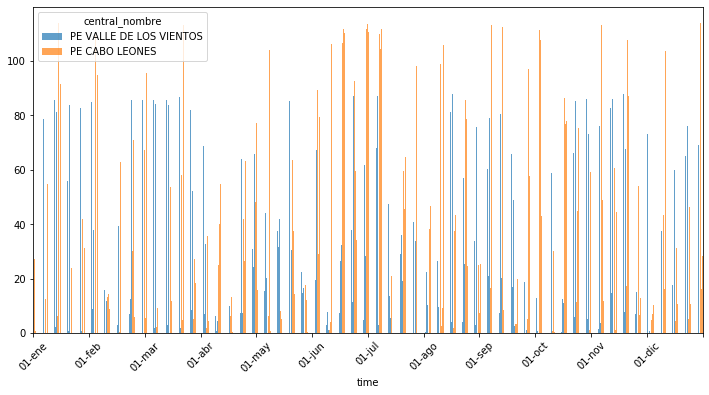

In [9]:
idx=np.round(np.linspace(0,8758,13)).astype('int')
label=['01-ene', '01-feb','01-mar', '01-abr', '01-may', '01-jun', '01-jul',
      '01-ago', '01-sep', '01-oct', '01-nov','01-dic']
df.iloc[:,[25,1]].plot(figsize=(12,6), alpha=0.7, kind = 'bar')
plt.xticks(idx,rotation=45, labels=label)
plt.show()

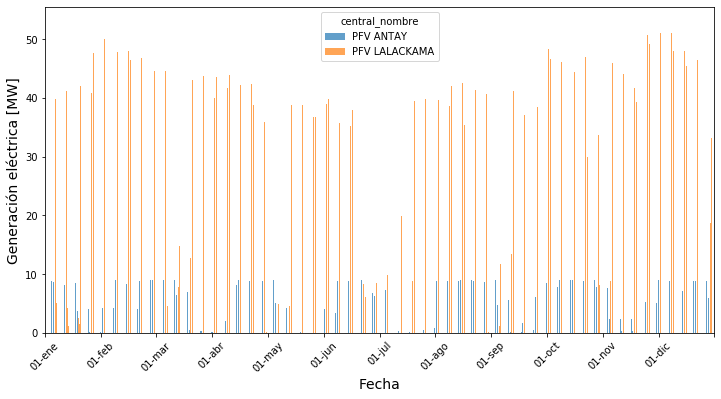

In [10]:
df.iloc[:,[27,40]].plot(figsize=(12,6), alpha=0.7, kind = 'bar')
plt.xticks(idx,rotation=45, labels=label)
plt.ylabel('Generación eléctrica [MW]', fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.show()

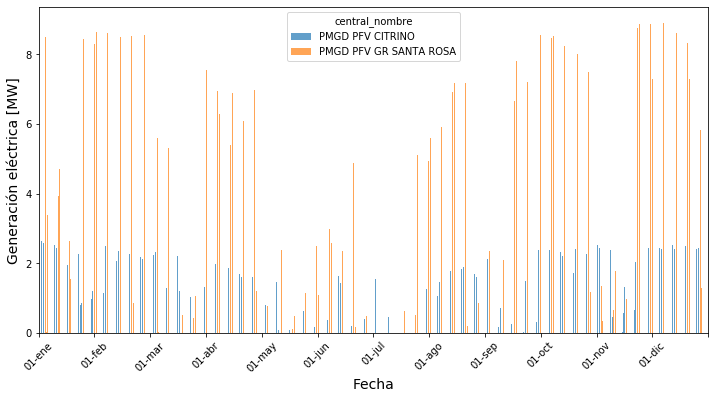

In [11]:
df.iloc[:,[80,101]].plot(figsize=(12,6), alpha=0.7, kind = 'bar')
plt.xticks(idx,rotation=45, labels=label)
plt.ylabel('Generación eléctrica [MW]', fontsize=14)
plt.xlabel('Fecha', fontsize=14)
plt.show()

 ## Normalización momentánea

In [12]:
from sklearn import preprocessing

def normalizar(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled, columns=df.columns)
    df = df.dropna(axis=1)
    return df

## Matriz de correlación

In [17]:
corrM = normalizar(df).corr()

ValueError: could not convert string to float: '2020-01-01'

In [ ]:
sn.heatmap(corrM)
plt.show()

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_correlations(df, corrm, n=5):
    au_corr = corrm.unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_top_complementarity(df, corrm, n=5):
    au_corr = corrm.unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]


print('Cantidad de pares de centrales:',len(get_redundant_pairs(df)))
print("Top Correlations")
print(get_top_correlations(df1, corrM,1000))
print('\n\n-------------------------\n\n')

print('Top Complementarity')
print(get_top_complementarity(df1, corrM,100))

In [ ]:
st=solar.groupby([solar['time'].dt.date]).sum()
eol=eolica.groupby([eolica['time'].dt.date]).sum()
plt.figure(figsize=(12,8))
plt.fill_between(st.index,st['generacion_real_mwh'], alpha=0.7)
plt.fill_between(eol.index,eol['generacion_real_mwh'], alpha=0.7)
plt.legend(['Solar', 'Eólica'],loc=2)
plt.grid()
plt.xlabel('Fecha', fontsize='14')
plt.ylabel('Energía generada [MWh]',fontsize=14)
plt.title('Generación de energía anual por tecnología con resolución diaria',fontsize=16)
plt.show()
st.index

In [ ]:
st=normalizar(st)
eol=normalizar(eol)
plt.figure(figsize=(12,8))
plt.fill_between(st.index,st['generacion_real_mwh'], alpha=0.7)
plt.fill_between(eol.index,eol['generacion_real_mwh'], alpha=0.7)
plt.legend(['Solar', 'Eólica'],loc=2)
plt.grid()
plt.xlabel('Fecha', fontsize='14')
plt.ylabel('Energía normalizada [MWh]',fontsize=14)
plt.title('Generación de energía anual normalizada por tecnología con resolución diaria',fontsize=16)
plt.show()


In [ ]:
eo_norm = normalizar(eolica.pivot_table(values='generacion_real_mwh', columns='central_nombre', index='time'))
so_norm = normalizar(solar.pivot_table(values='generacion_real_mwh', columns='central_nombre', index='time'))
plt.figure(figsize=(12,8))
plt.xticks(idx,rotation=45, labels=label)
plt.fill_between(so_norm.index,so_norm.mean(axis=1), alpha=0.7)
plt.fill_between(eo_norm.index,eo_norm.mean(axis=1), alpha=0.7)
plt.grid()
plt.show()

In [125]:
eolica.head()

fecha_opreal,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
hora_opreal,,,,,,,,,,,,,,,,,,,,,
0.0,505.540441,772.845560,825.188775,713.281526,470.592258,583.998666,412.981423,399.250783,923.813858,1187.149312,...,566.061295,587.648159,540.909473,467.814247,482.816142,542.552542,470.923074,1073.969652,1532.330218,527.659504
1.0,485.993825,368.955319,575.219272,707.323343,596.772814,425.461531,495.655796,383.297923,412.175750,827.180984,...,901.331250,533.964601,482.294311,516.196227,438.585467,481.682909,557.553457,288.970269,856.062283,1177.851977
2.0,490.719674,253.378255,511.545592,681.061121,459.957670,408.748827,398.877487,344.690070,430.339458,758.804316,...,768.998083,466.412104,451.734594,522.478744,443.061525,428.507045,486.254970,237.423616,690.682273,1005.034438
3.0,417.813716,300.792155,453.742969,576.420804,395.124972,402.424850,365.772188,311.146277,400.618357,652.315691,...,681.880788,467.656572,457.327350,561.319329,451.033325,416.621307,479.424025,244.901992,508.064830,895.793144
4.0,383.020663,301.646023,433.042383,521.029247,454.284139,383.602049,418.169939,279.857292,379.341346,577.088932,...,620.350887,548.504258,500.014337,563.834301,542.123732,397.145053,425.587012,224.352866,405.065228,670.997279


In [124]:
solar.head()

fecha_opreal,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
hora_opreal,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.000001,0.000000,0.0,0.000318,0.000333,0.000337,0.000000,0.0,0.0,...,0.002526,0.002769,0.002636,0.002504,0.002735,0.002649,0.002848,0.002509,0.002490,0.002529
1.0,0.0,0.000000,0.000004,0.0,0.000000,0.000317,0.000335,0.000337,0.0,0.0,...,0.002530,0.002620,0.002818,0.002666,0.002575,0.002724,0.002514,0.002836,0.005848,0.002391
2.0,0.0,0.000000,0.000000,0.0,0.000000,0.000314,0.000337,0.000338,0.0,0.0,...,0.002600,0.002520,0.002826,0.002588,0.002563,0.002723,0.002596,0.002837,0.005773,0.002433
3.0,0.0,0.000000,0.000000,0.0,0.000000,0.000310,0.000335,0.000339,0.0,0.0,...,0.002540,0.002503,0.002739,0.002504,0.002536,0.002587,0.002705,0.002777,0.005678,0.002451
4.0,0.0,0.000000,0.000000,0.0,0.000000,0.000308,0.000335,0.000330,0.0,0.0,...,0.002549,0.002523,0.002776,0.002463,0.002619,0.002595,0.002607,0.002628,0.005833,0.002349


In [123]:
df.head()

fecha_opreal,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
hora_opreal,,,,,,,,,,,,,,,,,,,,,
0.0,505.540441,772.845561,825.188775,713.281526,470.592576,583.998998,412.981760,399.250783,923.813858,1187.149312,...,566.063821,587.650928,540.912109,467.816751,482.818877,542.555191,470.925922,1073.972161,1532.332708,527.662033
1.0,485.993825,368.955319,575.219277,707.323343,596.772814,425.461847,495.656131,383.298260,412.175750,827.180984,...,901.333779,533.967221,482.297129,516.198894,438.588042,481.685634,557.555972,288.973105,856.068131,1177.854368
2.0,490.719674,253.378255,511.545592,681.061121,459.957670,408.749141,398.877824,344.690408,430.339458,758.804316,...,769.000683,466.414624,451.737420,522.481331,443.064088,428.509768,486.257567,237.426453,690.688047,1005.036871
3.0,417.813716,300.792155,453.742969,576.420804,395.124972,402.425160,365.772523,311.146615,400.618357,652.315691,...,681.883329,467.659074,457.330089,561.321833,451.035861,416.623895,479.426730,244.904769,508.070508,895.795596
4.0,383.020663,301.646023,433.042383,521.029247,454.284139,383.602357,418.170273,279.857621,379.341346,577.088932,...,620.353436,548.506782,500.017113,563.836764,542.126351,397.147648,425.589620,224.355493,405.071060,670.999628


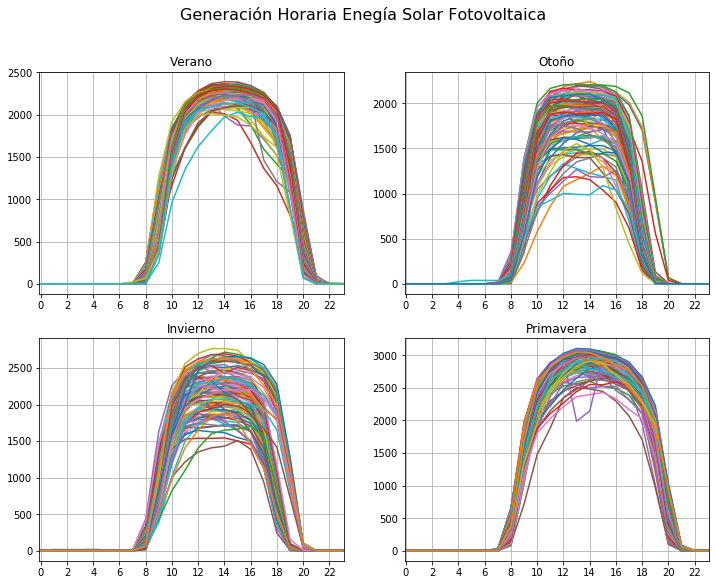

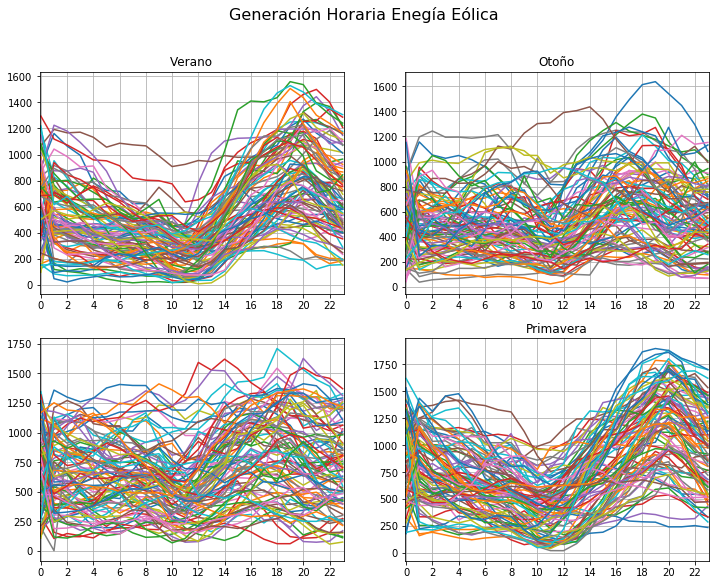

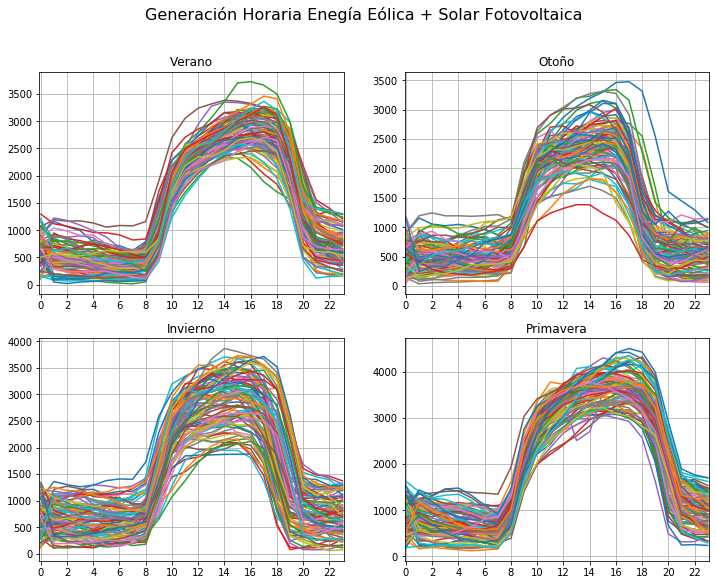

In [157]:
def plot_estaciones(df,titulo=None):
    verano = df.iloc[:,0:90]
    otoño = df.iloc[:,90:181]
    invierno = df.iloc[:,181:273]
    primavera = df.iloc[:,273:]

    plt.figure(figsize=(12,9))
    plt.suptitle(titulo, fontsize=16)
    plt.subplot(2,2,1)
    plt.plot(verano)
    plt.xlim([-0.1,23.1])
    plt.xticks(range(0,24,2))
    plt.grid()
    plt.title('Verano')

    plt.subplot(2,2,2)
    plt.plot(otoño)
    plt.title('Otoño')
    plt.xlim([-0.1,23.1])
    plt.xticks(range(0,24,2))
    plt.grid()

    plt.subplot(2,2,3)
    plt.plot(invierno)
    plt.title('Invierno')
    plt.xlim([-0.1,23.1])
    plt.xticks(range(0,24,2))
    plt.grid()

    plt.subplot(2,2,4)
    plt.plot(primavera)
    plt.title('Primavera')
    plt.xlim([-0.1,23.1])
    plt.xticks(range(0,24,2))
    plt.grid()

plot_estaciones(solar, 'Generación Horaria Enegía Solar Fotovoltaica')
plot_estaciones(eolica, 'Generación Horaria Enegía Eólica')
plot_estaciones(df, 'Generación Horaria Enegía Eólica + Solar Fotovoltaica')

## Clustering

In [183]:
from sklearn.cluster import KMeans

def metodo_codo(df):
    df = df.transpose()
    verano = df.iloc[0:90,:]
    otoño = df.iloc[90:181,:]
    invierno = df.iloc[181:273,:]
    primavera = df.iloc[273:,:]
    l = [verano, otoño, invierno, primavera]
    n =['Verano', 'Otoño', 'Invierno', 'Primavera']
    i=-1
    plt.figure(figsize=(12,9))
    plt.suptitle('Descubriendo cantidad de clusters por método del codo')
    for index in range(4):
        i+=1
        distancia=[]
        for n in range(2,15,1):
            model = KMeans(n_clusters=n)
            model.fit(l[i])
            distancia.append(model.inertia_)
        
        
        plt.subplot(2,2,i+1)
        #plt.title('%s'%n[i])
        plt.plot(range(2,15,1), distancia)
        plt.xticks(range(2,16))
        plt.grid() 

## Método del codo

Cuando se realizar clustering no supervisado, una forma práctica de estimar cuantos clusters corresponden a los datos presentados, es utilizar el método del codo, el cual, como su nombre lo dice consiste en encontrar el "codo" en que la suma de las distancias de cada muestra a los centroides de su respectivo cluster, esta aumenta considerablemente si se utiliza un cluster menos y no disminuye significativamente al utilizar un cluster más.

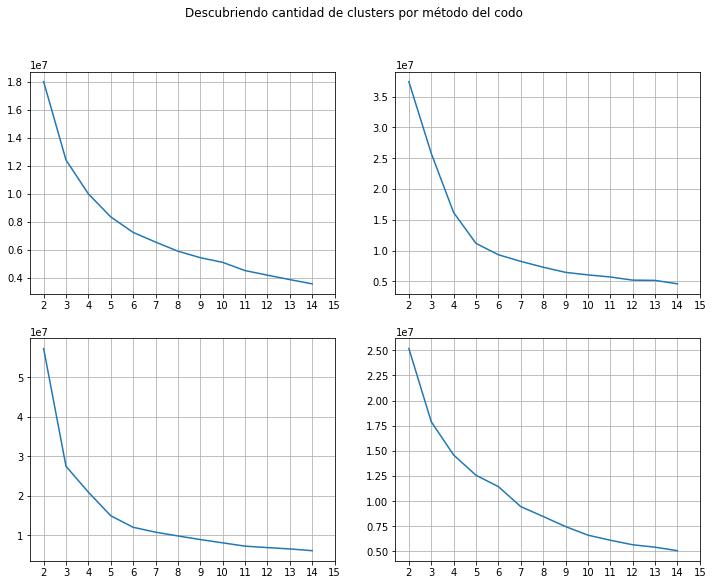

In [184]:
metodo_codo(solar)

1. Figura superior izquierda: En verano se aprecian 6 clusters.
2. Figura superior derecha: En Otoño se aprecian 5 clusters.
3. Figura inferior izquierda: En invierno se aprecian 5 clusters.
4. Figura inferior derecha: En primavera se aprecian 7 clusters.

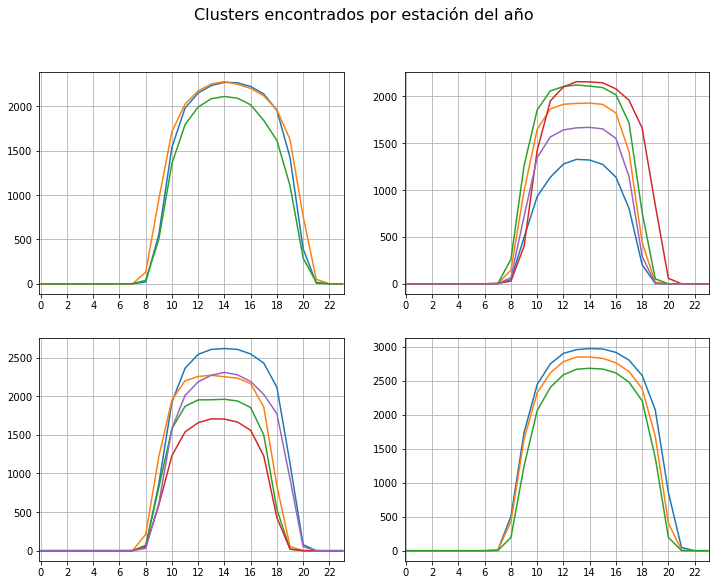

In [201]:
def plot_centroides(df, k):
    df = df.transpose()
    verano = df.iloc[0:90,:]
    otoño = df.iloc[90:181,:]
    invierno = df.iloc[181:273,:]
    primavera = df.iloc[273:,:]
    l = [verano, otoño, invierno, primavera]

    plt.figure(figsize=(12,9))
    plt.suptitle('Clusters encontrados por estación del año', fontsize=16)
    i=0
    for n in k:        
        model = KMeans(n_clusters=n)
        model.fit(l[i])
        i+=1
        a = model.cluster_centers_
        plt.subplot(2,2,i)
        plt.plot(np.transpose(a))
        plt.xlim([-0.1,23.1])
        plt.xticks(range(0,24,2))
        plt.grid()
        
plot_centroides(solar, [3,5,5,3])

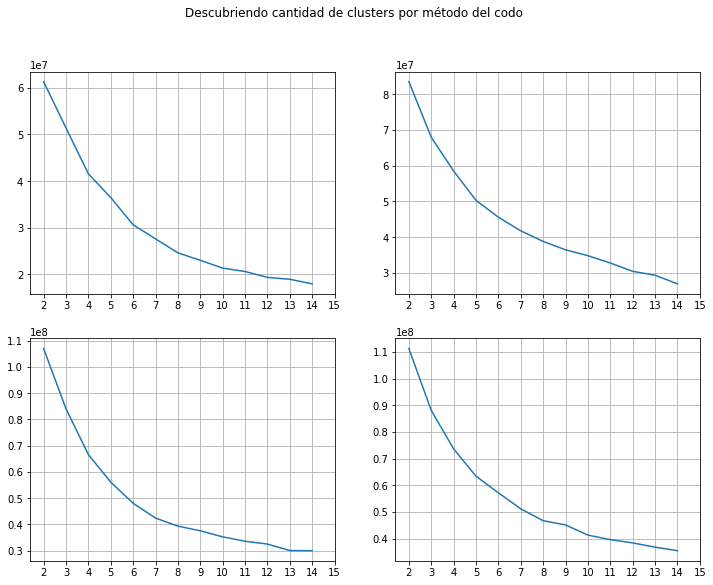

In [194]:
metodo_codo(eolica)

En este caso en el recurso eólico es más difícil visualizar el codo puesto que como se ve en la gráfica por estación del recurso eólico, la generación tiene mayor variabilidad que la que entregan los paneles solares.

1. Figura superior izquierda: En verano se aprecian 6 clusters.
2. Figura superior derecha: En Otoño se aprecian 5 clusters.
3. Figura inferior izquierda: En invierno se aprecian 7 clusters.
4. Figura inferior derecha: En primavera se aprecian 8 clusters.

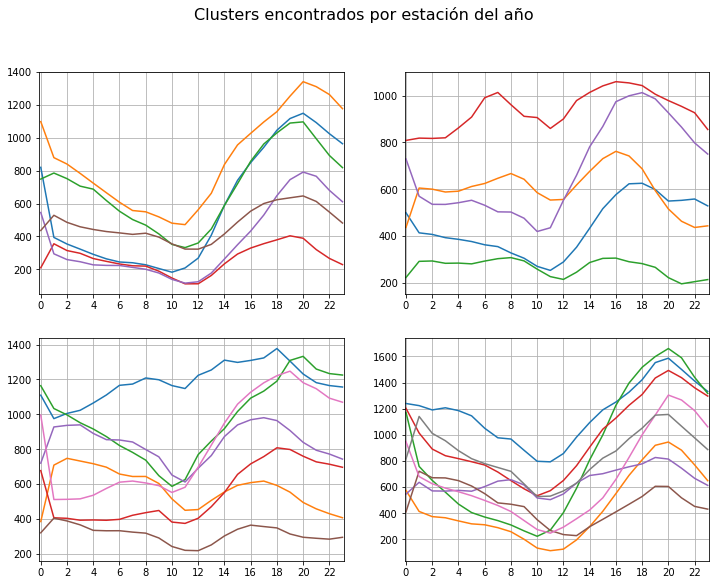

In [196]:
plot_centroides(eolica, [6,5,7,8])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

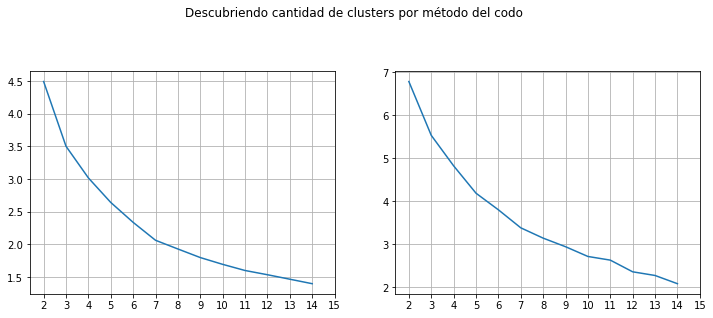

In [198]:
maxi = df.max().max()

df = df/ maxi
metodo_codo(df)

fecha_opreal,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
hora_opreal,,,,,,,,,,,,,,,,,,,,,
0.0,505.540441,772.845561,825.188775,713.281526,470.592576,583.998998,412.981760,399.250783,923.813858,1187.149312,...,566.063821,587.650928,540.912109,467.816751,482.818877,542.555191,470.925922,1073.972161,1532.332708,527.662033
1.0,485.993825,368.955319,575.219277,707.323343,596.772814,425.461847,495.656131,383.298260,412.175750,827.180984,...,901.333779,533.967221,482.297129,516.198894,438.588042,481.685634,557.555972,288.973105,856.068131,1177.854368
2.0,490.719674,253.378255,511.545592,681.061121,459.957670,408.749141,398.877824,344.690408,430.339458,758.804316,...,769.000683,466.414624,451.737420,522.481331,443.064088,428.509768,486.257567,237.426453,690.688047,1005.036871
3.0,417.813716,300.792155,453.742969,576.420804,395.124972,402.425160,365.772523,311.146615,400.618357,652.315691,...,681.883329,467.659074,457.330089,561.321833,451.035861,416.623895,479.426730,244.904769,508.070508,895.795596
4.0,383.020663,301.646023,433.042383,521.029247,454.284139,383.602357,418.170273,279.857621,379.341346,577.088932,...,620.353436,548.506782,500.017113,563.836764,542.126351,397.147648,425.589620,224.355493,405.071060,670.999628
